# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
import numpy as np

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
import random
def dice_rolling(x):
    possible_results = [1,2,3,4,5,6]
    dice = random.choices(possible_results,k=x)
    df = pd.DataFrame(dice)
    df.index += 1
    df.columns=['result']
    dice.sort()
    return df,dice

In [3]:
dice_df,dice = dice_rolling(10)
dice_df

,result
1,5
2,1
3,2
4,5
5,2
6,3
7,2
8,2
9,2
10,6


#### 2.- Plot the results sorted by value.

<AxesSubplot:>

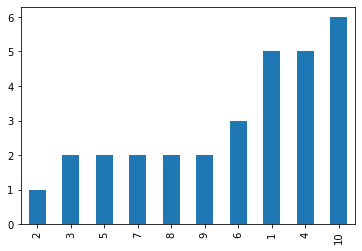

In [4]:
# your code here
dice_df["result"].sort_values(ascending= True).plot.bar()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [5]:
# your code here
frequency = dice_df.value_counts()
result_frequency = pd.DataFrame(frequency)
result_frequency.columns = ['frequency']
result_frequency = result_frequency.sort_values(by = "result")
result_frequency


,frequency
result,
1,1
2,5
3,1
5,2
6,1


<AxesSubplot:xlabel='result'>

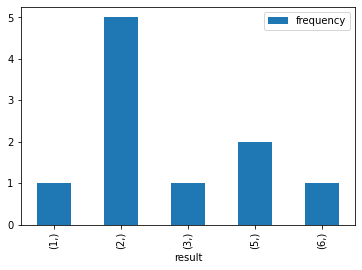

In [6]:
result_frequency.plot.bar()

In [7]:
"""
The first plot represents the result of each turn rolling the dice (first turn = 1 and last throw = 10).
The second plot represents the number of times we got each possible result within 10 turns.  
While looking at both plots, we can see the relation between them when we see that the number of columns with the same value in the first plot (example: 
3 bars with value 4), is represented in the second plot as the bar for result 4, has frequency 3, which means the result 4 was obtained 3 times in the 10 turns. 
"""

'\nThe first plot represents the result of each turn rolling the dice (first turn = 1 and last throw = 10).\nThe second plot represents the number of times we got each possible result within 10 turns.  \nWhile looking at both plots, we can see the relation between them when we see that the number of columns with the same value in the first plot (example: \n3 bars with value 4), is represented in the second plot as the bar for result 4, has frequency 3, which means the result 4 was obtained 3 times in the 10 turns. \n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here
def fun_mean(array):
    long = len(array)
    summ = sum(array)
    mean = summ/long
    return mean

In [55]:
fun_mean(dice)

3.0

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [82]:
# your code here

def dice_result_freq_calculator(array):
    dice_possible_results = [1,2,3,4,5,6]
    result_freq = {}
    result_freq = result_freq.fromkeys(dice_possible_results)

    for key, values in result_freq.items():
        result_freq[key] = 0
        
    for i in array:
        if i in result_freq.keys():
            result_freq[i] += 1
    return pd.DataFrame.from_dict(result_freq, orient = "index", columns = ["frequency"])

In [83]:
dice_result_freq_calculator(dice_df['result'])

,frequency
1,1
2,5
3,1
4,0
5,2
6,1


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [58]:
# your code here
def fun_median(array):
    array = list(array)
    array.sort()
    x = int (len(array)/2)
    if (len(array)%2)==0:
        t = (array[x]+array[x-1])/2
    else: 
        t = array[x]
    return t   

fun_median(result_frequency["frequency"])

1

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [59]:
# your code here
def my_quartiles(x):
    if len(array)%2 != 0:
        array.sort()
        q2 = fun_median(array)
        left_list = array[:array.index(q2)]
        q1 = fun_median(left_list)
        right_list = array[array.index(q2)+1:]
        q3 = fun_median(right_list)
        return f'q1 = {q1}, q2 = {q2}, q3 = {q3}'
    elif len(array)%2 ==0:
        array.sort()
        middle1 = int(len(array)/2)
        middle2 = int(middle1 -1)
        q2 = (array[middle1] + array[middle2])/2
        left_list = array[:middle2]
        q1 = fun_median(left_list)
        right_list = array[middle1:]
        q3 = fun_median(right_list)
        return f'q1 = {q1}, q2 = {q2}, q3 = {q3}'

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [66]:
# your code here
roll_dice_hundred = pd.read_csv('../data/roll_the_dice_hundred.csv')
roll_dice_hundred.head()

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6


<AxesSubplot:>

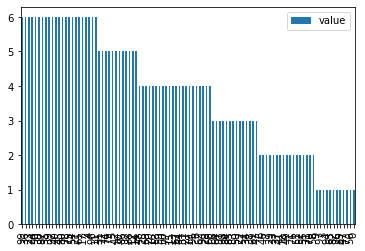

In [61]:
roll_dice_hundred = roll_dice_hundred.sort_values(by='value', ascending=False)
roll_dice_hundred[['value']].plot.bar()

In [62]:
"""
your comments here
"""

'\nyour comments here\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [63]:
# your code here
fun_mean(roll_dice_hundred["value"])

3.74

#### 3.- Now, calculate the frequency distribution.


In [86]:
# your code here
pd_result_freq = dice_result_freq_calculator(roll_dice_hundred["value"])
pd_result_freq

,frequency
1,12
2,17
3,14
4,22
5,12
6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<AxesSubplot:ylabel='Frequency'>

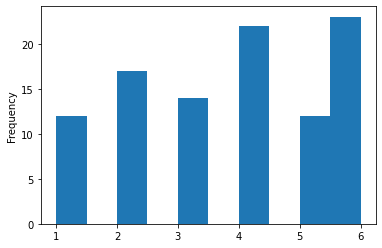

In [90]:
# your code here
roll_dice_hundred['value'].plot.hist()

In [ ]:
"""
your comments here
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

<AxesSubplot:ylabel='Frequency'>

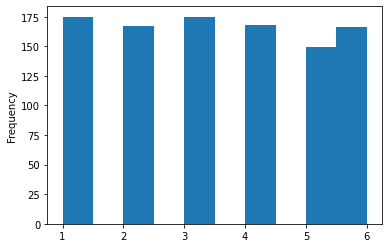

In [92]:
# your code here
roll_dice_thousand = pd.read_csv('../data/roll_the_dice_thousand.csv')

roll_dice_thousand['value'].plot.hist()

In [ ]:
"""
The greater the sample size, the more balanced the distribution.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [111]:
# your code here
ages_population = pd.read_csv('../data/ages_population.csv')
ages_population.head()

freq = ages_population['observation'].value_counts()
pd.DataFrame(freq)

,observation
39.0,45
41.0,36
30.0,34
35.0,33
43.0,32
...,...
73.0,1
82.0,1
70.0,1
71.0,1


<AxesSubplot:ylabel='Frequency'>

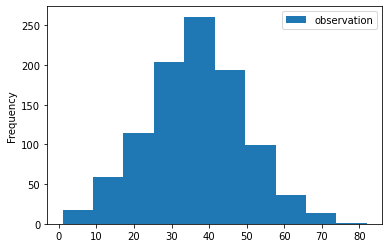

In [97]:
# your code here
ages_population.plot.hist()

In [ ]:
"""
the distribution is normal, the mean is approx 37 years (between 35 and 42 approx) and std desviation can be between 10 and 15
"""

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [100]:
# your code here
fun_mean(ages_population['observation'])

36.56

In [110]:
# your code here
ages_population['observation'].std()

12.816499625976762

In [ ]:
"""
Yes, it is pretty close to what I guessed.
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [112]:
# your code here
ages_population2 = pd.read_csv('../data/ages_population2.csv')
ages_population2.head()

freq2 = ages_population2['observation'].value_counts()
pd.DataFrame(freq2)

,observation
28.0,139
27.0,125
26.0,120
29.0,115
25.0,98
30.0,90
24.0,78
31.0,61
23.0,41
22.0,35


<AxesSubplot:ylabel='Frequency'>

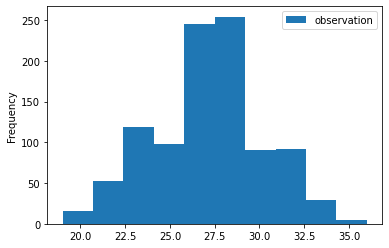

In [113]:
# your code here
ages_population2.plot.hist()

In [114]:
# your code here
fun_mean(ages_population2['observation'])

27.155

In [115]:
# your code here
ages_population2['observation'].std()

2.969813932689186

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [ ]:
# your code here

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""